In [6]:
import pandas as pd
import numpy as np
import csv
import json
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import scipy.stats as sp

# Download

In [3]:
def get_code(group, region, demographic, iterand):
    REGION_MAP = {"north": ['A', 'B'], "south": ['C', 'D']}
    CATEGORY_MAP = {"musician": "X", "non-musician": "Y"}
    filename = str(group)+REGION_MAP[region][iterand] + CATEGORY_MAP[demographic]+str(group)
    return filename

# Pairwise Data

In [4]:
# Opening JSON file
f = open('./json/pairwise.json')
  
# returns JSON object as 
data = json.load(f)

f.close()

for item in data:
    user = item['username']
    similarity = item['similarity']
    # open the file in the write mode
    with open('./output/india/pairwise/raw/'+str(user)+'.csv', 'w', newline='\n') as f:
        rows = similarity.split('\n')
        for row in rows:
            characters = row.split(',')
            line = []
            for x in characters:
                try:
                    line.append(int(x))
                except:
                    line.append('')
            writer = csv.writer(f)
            writer.writerow(line)

In [6]:
def generate_id(demographic, group):
    if demographic == 'north':
        ids = ['AX', 'BX', 'AY', 'BY']
    elif demographic == 'south':
        ids = ['CX', 'DX', 'CY', 'DY']
    elif demographic == 'musician':
        ids = ['AX', 'BX', 'CX', 'DX']
    elif demographic == 'non':
        ids = ['AY', 'BY', 'CY', 'DY']
    else:
        ids = ['AX', 'BX', 'CX', 'DX', 'AY', 'BY', 'CY', 'DY']
    return [str(group)+element+str(group) for element in ids]

In [7]:
def intersection(group_1, group_2):
    interesect = [pid for pid in group_1 if pid in group_2]
    return interesect

In [13]:
a = generate_id('north', 0)
b = generate_id('non', 0)
intersection(a, b)

['0AY0', '0BY0']

In [16]:
def average_pair_group_data(first_id, participants):
    PATH = './output/india/pairwise/raw/'
    sum_df = pd.read_csv(PATH+first_id+'.csv', header=None).fillna(0)
    for pid in participants:
        df2 = pd.read_csv(PATH+pid+'.csv', header=None).fillna(0)
        sum_df = sum_df.add(df2, fill_value=0)
    average = sum_df.div(len(participants)+1)
    return average

In [17]:
def save_pair_data(category):
    empty_df = pd.DataFrame(index=range(30),columns=range(30)).fillna(0)

    group_0_ids = generate_id(category,0)
    group_0 = average_pair_group_data(group_0_ids[0], group_0_ids[1:])
    empty_df.iloc[0:5,0:5] = group_0

    group_1_ids = generate_id(category,1)
    group_1 = average_pair_group_data(group_1_ids[0], group_1_ids[1:])
    empty_df.iloc[5:10,5:10] = group_1

    group_2_ids = generate_id(category,2)
    group_2 = average_pair_group_data(group_2_ids[0], group_2_ids[1:])
    empty_df.iloc[10:15,10:15] = group_2


    group_3_ids = generate_id(category, 3)
    group_3 = average_pair_group_data(group_3_ids[0], group_3_ids[1:])
    empty_df.iloc[15:20,15:20] = group_3

    group_4_ids = generate_id(category, 4)
    group_4 = average_pair_group_data(group_4_ids[0], group_4_ids[1:])
    empty_df.iloc[20:25,20:25] = group_4

    group_5_ids = generate_id(category, 5)
    group_5 = average_pair_group_data(group_5_ids[0], group_5_ids[1:])
    empty_df.iloc[25:30,25:30] = group_5

    empty_df.to_csv('./output/india/pairwise/full_'+category+'.csv', index=None)

In [18]:
save_pair_data('all')
save_pair_data('north')
save_pair_data('south')
save_pair_data('musician')
save_pair_data('non')

## Intra rater

In [ ]:
import itertools

PATH='./output/india/pairwise/raw/'

group_0_ids = generate_id('all',0)
results = pd.DataFrame(columns=['ID1', 'ID2', 'r', 'p-value'])

# combinations(group_0_ids, 2)
# subsets = list(itertools.)
# subset = subsets[0]
df1 = pd.read_csv(PATH+group_0_ids[0]+'.csv', header=None).fillna(0)
df2 = pd.read_csv(PATH+group_0_ids[1]+'.csv', header=None).fillna(0)
# results.loc[len(results)] = list_row
r, p = sp.pearsonr(df1,df2)
# for subset in itertools.combinations(group_0_ids, 2):
#     df1 = pd.read_csv(PATH+subset[0]+'.csv', header=None).fillna(0)
#     df2 = pd.read_csv(PATH+subset[1]+'.csv', header=None).fillna(0)
#     results.loc[len(results)] = list_row
#     r, p = sp.pearsonr(df1,df2)
#     list_row = [subset[0], subset[1], ]
# def calculate_correlation(participants):
#     list(itertools.permutations([1, 2, 3]))
#     for i in len(participants):
#         for j in len(participants)-1:
#             df2 = pd.read_csv(PATH+pid+'.csv', header=None).fillna(0)
#             sum_df = sum_df.add(df2, fill_value=0)

In [73]:
def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr

In [ ]:
PATH = './output/india/pairwise/raw/'

indian_pairwise = []
for i in range(6):
    pid = str(i)+'AX'+str(i)
    npar = pd.read_csv(PATH+pid+'.csv').to_numpy()
    print(pid)
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    indian_pairwise.extend(x)
indian_pairwise = [1- (x / 100) for x in indian_pairwise]

## Groups 

In [21]:
def save_pair_intersect_data(category1, category2):
    empty_df = pd.DataFrame(index=range(30),columns=range(30)).fillna(0)

    group_0_ids_a = generate_id(category1,0)
    group_0_ids_b = generate_id(category2,0)
    group_0_ids = intersection(group_0_ids_a, group_0_ids_b)
    group_0 = average_pair_group_data(group_0_ids[0], group_0_ids[1:])
    empty_df.iloc[0:5,0:5] = group_0

    group_1_ids_a = generate_id(category1,1)
    group_1_ids_b = generate_id(category2,1)
    group_1_ids = intersection(group_1_ids_a, group_1_ids_b)
    group_1 = average_pair_group_data(group_1_ids[0], group_1_ids[1:])
    empty_df.iloc[5:10,5:10] = group_1

    group_2_ids_a = generate_id(category1,2)
    group_2_ids_b = generate_id(category2,2)
    group_2_ids = intersection(group_2_ids_a, group_2_ids_b)
    group_2 = average_pair_group_data(group_2_ids[0], group_2_ids[1:])
    empty_df.iloc[10:15,10:15] = group_2


    group_3_ids_a = generate_id(category1,3)
    group_3_ids_b = generate_id(category2,3)
    group_3_ids = intersection(group_3_ids_a, group_3_ids_b)
    group_3 = average_pair_group_data(group_3_ids[0], group_3_ids[1:])
    empty_df.iloc[15:20,15:20] = group_3

    group_4_ids_a = generate_id(category1,4)
    group_4_ids_b = generate_id(category2,4)
    group_4_ids = intersection(group_4_ids_a, group_4_ids_b)
    group_4 = average_pair_group_data(group_4_ids[0], group_4_ids[1:])
    empty_df.iloc[20:25,20:25] = group_4

    group_5_ids_a = generate_id(category1,5)
    group_5_ids_b = generate_id(category2,5)
    group_5_ids = intersection(group_5_ids_a, group_5_ids_b)
    group_5 = average_pair_group_data(group_5_ids[0], group_5_ids[1:])
    empty_df.iloc[25:30,25:30] = group_5

    empty_df.to_csv('./output/india/pairwise/full_'+category1+'_'+category2+'.csv', index=None)

In [22]:
save_pair_intersect_data('north', 'musician')
save_pair_intersect_data('south', 'musician')
save_pair_intersect_data('north', 'non')
save_pair_intersect_data('south', 'non')

# Feature Data

In [27]:
# Opening JSON file
f = open('./json/evaluation.json')
data = json.load(f)
f.close()

for participant in data:
    username = participant['username']
    features = participant['matrix']
    df = pd.DataFrame(features)
    df.to_csv('./output/india/feature/raw/'+username+'.csv', index=False)

# Formatting

In [28]:
def get_feature_data(code):
    PATH = './output/india/feature/raw/'
    df = pd.read_csv(PATH+code+'.csv')
    return df

def average_group_data(first_id, participants):
    sum_df = get_feature_data(first_id).drop(["song_id", "edited"], axis=1)
    for pid in participants:
        df2 = get_feature_data(pid).drop(["song_id", "edited"], axis=1)
        sum_df = sum_df.add(df2, fill_value=0)
    average = sum_df.div(len(participants)+1)
    return average

In [29]:
def generate_id(demographic, group):
    if demographic == 'north':
        ids = ['AX', 'BX', 'AY', 'BY']
    elif demographic == 'south':
        ids = ['CX', 'DX', 'CY', 'DY']
    elif demographic == 'musician':
        ids = ['AX', 'BX', 'CX', 'DX']
    elif demographic == 'non':
        ids = ['AY', 'BY', 'CY', 'DY']
    else:
        ids = ['AX', 'BX', 'CX', 'DX', 'AY', 'BY', 'CY', 'DY']
    return [str(group)+element+str(group) for element in ids]

# All Evaluation

In [30]:
def generate_full_feature(category):
    group_0_ids = generate_id(category, 0)
    group_0 = average_group_data(group_0_ids[0], group_0_ids[1:])

    group_1_ids = generate_id(category, 1)
    group_1 = average_group_data(group_1_ids[0], group_1_ids[1:])

    group_2_ids = generate_id(category, 2)
    group_2 = average_group_data(group_2_ids[0], group_2_ids[1:])

    group_3_ids = generate_id(category, 3)
    group_3 = average_group_data(group_3_ids[0], group_3_ids[1:])

    group_4_ids = generate_id(category, 4)
    group_4 = average_group_data(group_4_ids[0], group_4_ids[1:])

    group_5_ids = generate_id(category, 5)
    group_5 = average_group_data(group_5_ids[0], group_5_ids[1:])

    df = pd.concat([group_0, group_1, group_2, group_3, group_4, group_5]).reset_index(drop=True)
    df = df.round(2)

    df.to_csv('./output/india/feature/full_'+category+'.csv', index=None)

In [31]:
def generate_full_combined_feature(category1, category2):
    group_0_ids_a = generate_id(category1,0)
    group_0_ids_b = generate_id(category2,0)
    group_0_ids = intersection(group_0_ids_a, group_0_ids_b)
    group_0 = average_group_data(group_0_ids[0], group_0_ids[1:])

    group_1_ids_a = generate_id(category1,1)
    group_1_ids_b = generate_id(category2,1)
    group_1_ids = intersection(group_1_ids_a, group_1_ids_b)
    group_1 = average_group_data(group_1_ids[0], group_1_ids[1:])

    group_2_ids_a = generate_id(category1,2)
    group_2_ids_b = generate_id(category2,2)
    group_2_ids = intersection(group_2_ids_a, group_2_ids_b)
    group_2 = average_group_data(group_2_ids[0], group_2_ids[1:])

    group_3_ids_a = generate_id(category1,3)
    group_3_ids_b = generate_id(category2,3)
    group_3_ids = intersection(group_3_ids_a, group_3_ids_b)
    group_3 = average_group_data(group_3_ids[0], group_3_ids[1:])

    group_4_ids_a = generate_id(category1,4)
    group_4_ids_b = generate_id(category2,4)
    group_4_ids = intersection(group_4_ids_a, group_4_ids_b)
    group_4 = average_group_data(group_4_ids[0], group_4_ids[1:])

    group_5_ids_a = generate_id(category1,5)
    group_5_ids_b = generate_id(category2,5)
    group_5_ids = intersection(group_5_ids_a, group_5_ids_b)
    group_5 = average_group_data(group_5_ids[0], group_5_ids[1:])

    df = pd.concat([group_0, group_1, group_2, group_3, group_4, group_5]).reset_index(drop=True)
    df = df.round(2)

    df.to_csv('./output/india/feature/full_'+category1+'_'+category2+'.csv', index=None)

In [32]:
generate_full_feature('all')
generate_full_feature('north')
generate_full_feature('south')
generate_full_feature('musician')
generate_full_feature('non')

In [37]:
generate_full_combined_feature('north', 'musician')
generate_full_combined_feature('south', 'musician')
generate_full_combined_feature('north', 'non')
generate_full_combined_feature('south', 'non')

## Individual Distance Matrices

In [90]:
def get_feature_distance(input_data):
    data = squareform(pdist(input_data, metric='euclidean'))
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler.transform(data).round(4)

In [91]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']

feature_mappings = {
    'overlap':'vocal_texture',
    'creativity':'familiarity',
    'likeness':'liking',
    'tempo':'tempo',
    'consonance':'consonance',
    'emotion':'valence',
    'decoration':'ornamentation',
    'range':'vocal_range',
    'quality':'sound_quality',
    'rhythm':'rhythmic_regularity',
    'excitingness':'excitement',
    'groove':'grooviness',
    'timbre':'vocal_tension'
}

full_feature = pd.read_csv('./output/india/feature/full_all.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(full_feature[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_full.csv')
    
north = pd.read_csv('./output/india/feature/full_north.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(north[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_north.csv')

south = pd.read_csv('./output/india/feature/full_south.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(south[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_south.csv')

musician = pd.read_csv('./output/india/feature/full_musician.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(musician[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_musician.csv')

non = pd.read_csv('./output/india/feature/full_non_musician.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(non[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_non_musician.csv')
    
north_musician = pd.read_csv('./output/india/feature/full_north_musician.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(north_musician[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_north_musician.csv')

south_musician = pd.read_csv('./output/india/feature/full_south_musician.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(south_musician[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_south_musician.csv')

south_non = pd.read_csv('./output/india/feature/full_south_non.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(south_non[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_south_non.csv')

north_non = pd.read_csv('./output/india/feature/full_north_non.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(north_non[[feature]]))
    feature_df.to_csv('./output/india/feature-distance/'+feature_mappings[feature]+'_north_non.csv')

# Bollywood

In [28]:
# # Opening JSON file
# f = open('./json/bollywood.json')
# data = json.load(f)
# f.close()

# for participant in data:
#     username = participant['username']
#     features = participant['matrix']
#     df = pd.DataFrame(features)
#     df.to_csv('./output/india/bollywood/raw/'+username+'.csv', index=False)

In [74]:
def generate_bollywood_id(demographic, group):
    if demographic == 'north':
        ids = ['AX', 'BX', 'AY', 'BY', 'EX', 'EY', 'FX', 'FY']
    elif demographic == 'south':
        ids = ['CX', 'DX', 'CY', 'DY', 'GX', 'HX', 'GY', 'HY']
    elif demographic == 'musician':
        ids = ['AX', 'BX', 'CX', 'DX', 'EX', 'FX', 'GX', 'HX']
    elif demographic == 'non':
        ids = ['AY', 'BY', 'CY', 'DY', 'EY', 'FY', 'GY', 'HY']
    elif demographic == 'northnon':
        ids = ['AY', 'BY', 'EY', 'FY']
    elif demographic == 'northmus':
        ids = ['AX', 'BX', 'EX', 'FX']
    elif demographic == 'southnon':
        ids = ['CY', 'DY', 'GY', 'HY']
    elif demographic == 'southmus':
        ids = ['CX', 'DX', 'GX', 'HX']
    else:
        ids = ['AX', 'BX', 'CX', 'DX', 'EX', 'FX', 'GX', 'HX', 'AY', 'BY', 'CY', 'DY', 'EY', 'FY', 'GY', 'HY']
    return [str(group)+element+str(group) for element in ids]

In [2]:
def get_bollywood_feature_data(code):
    PATH = './output/india/bollywood/raw/'
    df = pd.read_csv(PATH+code+'.csv')
    return df

In [64]:
def average_bollywood_group_data(first_id, participants):
    sum_df = get_bollywood_feature_data(first_id).drop(["id", "edited"], axis=1)[:6]
    total = len(participants)+1
    for pid in participants:
        try:
            df2 = get_bollywood_feature_data(pid).drop(["id", "edited"], axis=1)[:6]
            sum_df = sum_df.add(df2, fill_value=0)
        except:
            total = total - 1
    average = sum_df.div(total)
    return average

In [83]:
def average_bollywood_unique_data(first_id, participants):
    sum_df = get_bollywood_feature_data(first_id).drop(["id", "edited"], axis=1)[4:]
    total = len(participants)+1
    for pid in participants:
        try:
            df2 = get_bollywood_feature_data(pid).drop(["id", "edited"], axis=1)[4:]
            sum_df = sum_df.add(df2, fill_value=0)
        except:
            total = total - 1
    average = sum_df.div(total)
    return average

In [65]:
def generate_partial_bollywood_feature(category):
    group_0_ids = generate_bollywood_id(category, 0)
    group_0 = average_bollywood_group_data(group_0_ids[0], group_0_ids[1:])

    group_1_ids = generate_bollywood_id(category, 1)
    group_1 = average_bollywood_group_data(group_1_ids[0], group_1_ids[1:])

    group_2_ids = generate_bollywood_id(category, 2)
    group_2 = average_bollywood_group_data(group_2_ids[0], group_2_ids[1:])

    group_3_ids = generate_bollywood_id(category, 3)
    group_3 = average_bollywood_group_data(group_3_ids[0], group_3_ids[1:])
    
    df = pd.concat([group_0, group_1, group_2, group_3])
    sum_df = group_0+group_1+group_2+group_3
    df = sum_df/4
    df = df.round(2)
    df.to_csv('./output/india/bollywood/partial_'+category+'.csv', index=None)

In [75]:
generate_partial_bollywood_feature('all')
generate_partial_bollywood_feature('north')
generate_partial_bollywood_feature('south')
generate_partial_bollywood_feature('musician')
generate_partial_bollywood_feature('non')
generate_partial_bollywood_feature('northmus')
generate_partial_bollywood_feature('northnon')
generate_partial_bollywood_feature('southmus')
generate_partial_bollywood_feature('southnon')

In [105]:
full_feature = pd.read_csv('./output/india/bollywood/partial_all.csv')
full_feature

,ornamentation,grooviness,familiarity,liking,consonance,valence,excitement,sound_quality,tempo,rhythmic_regularity,vocal_range,vocal_tension,vocal_texture,instrument_vocal_overlap,instrument_overlap,instrument_tone_blend,instrument_rhythm_blend
0,48.96,30.21,71.88,67.71,70.83,63.54,38.54,76.04,38.54,73.96,38.54,25.00,1.04,36.46,53.12,53.12,59.37
1,45.83,58.33,45.83,60.42,66.67,65.62,68.75,72.92,52.08,67.71,36.46,39.58,20.83,52.08,55.21,48.96,61.46
2,53.12,48.96,67.71,64.58,69.79,64.58,61.46,76.04,51.04,73.96,43.75,40.62,15.62,34.38,58.33,54.17,57.29
3,51.04,40.62,58.33,63.54,58.33,57.29,52.08,64.58,53.12,69.79,44.79,46.88,10.42,41.67,57.29,48.96,56.25
4,54.17,36.46,67.71,65.62,75.00,68.75,44.79,76.04,36.46,62.50,38.54,28.12,11.46,52.08,55.21,47.92,54.17
5,43.75,58.33,40.62,64.58,69.79,67.71,64.58,69.79,50.00,71.88,34.38,33.33,9.38,43.75,56.25,51.04,58.33


In [84]:
def generate_full_bollywood_feature(category):
    group_0_ids = generate_bollywood_id(category, 0)
    group_0 = average_bollywood_group_data(group_0_ids[0], group_0_ids[1:])

    group_1_ids = generate_bollywood_id(category, 1)
    group_1 = average_bollywood_group_data(group_1_ids[0], group_1_ids[1:])

    group_2_ids = generate_bollywood_id(category, 2)
    group_2 = average_bollywood_group_data(group_2_ids[0], group_2_ids[1:])

    group_3_ids = generate_bollywood_id(category, 3)
    group_3 = average_bollywood_group_data(group_3_ids[0], group_3_ids[1:])
    
    df = pd.concat([group_0, group_1, group_2, group_3])
    sum_df = group_0+group_1+group_2+group_3
    df = sum_df/4
    
    group_0 = average_bollywood_unique_data(group_0_ids[0], group_0_ids[1:])
    group_1 = average_bollywood_unique_data(group_1_ids[0], group_1_ids[1:])
    group_2 = average_bollywood_unique_data(group_2_ids[0], group_2_ids[1:])
    group_3 = average_bollywood_unique_data(group_3_ids[0], group_3_ids[1:])
    
    df = pd.concat([df, group_0, group_1, group_2, group_3])
    df = df.round(2)
    df.to_csv('./output/india/bollywood/full_'+category+'.csv', index=None)

In [88]:
generate_full_bollywood_feature('all')
generate_partial_bollywood_feature('north')
generate_partial_bollywood_feature('south')
generate_partial_bollywood_feature('musician')
generate_partial_bollywood_feature('non')
generate_partial_bollywood_feature('northmus')
generate_partial_bollywood_feature('northnon')
generate_partial_bollywood_feature('southmus')
generate_partial_bollywood_feature('southnon')

In [94]:
full_feature = pd.read_csv('./output/india/bollywood/full_all.csv')
for feature in full_feature.columns:
    feature_df = pd.DataFrame(get_feature_distance(full_feature[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_full.csv')
    
north = pd.read_csv('./output/india/feature/full_north.csv')
for feature in north.columns:
    feature_df = pd.DataFrame(get_feature_distance(north[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_north.csv')

south = pd.read_csv('./output/india/feature/full_south.csv')
for feature in south.columns:
    feature_df = pd.DataFrame(get_feature_distance(south[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_south.csv')

musician = pd.read_csv('./output/india/feature/full_musician.csv')
for feature in musician.columns:
    feature_df = pd.DataFrame(get_feature_distance(musician[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_musician.csv')

non = pd.read_csv('./output/india/feature/full_non_musician.csv')
for feature in non.columns:
    feature_df = pd.DataFrame(get_feature_distance(non[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_non_musician.csv')
    
northnon = pd.read_csv('./output/india/feature/full_north_non.csv')
for feature in northnon.columns:
    feature_df = pd.DataFrame(get_feature_distance(northnon[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_northnon.csv')

southnon = pd.read_csv('./output/india/feature/full_south_non.csv')
for feature in southnon.columns:
    feature_df = pd.DataFrame(get_feature_distance(southnon[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_southnon.csv')

northmus = pd.read_csv('./output/india/feature/full_north_musician.csv')
for feature in northmus.columns:
    feature_df = pd.DataFrame(get_feature_distance(northmus[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_northmus.csv')

southmus = pd.read_csv('./output/india/feature/full_south_musician.csv')
for feature in southmus.columns:
    feature_df = pd.DataFrame(get_feature_distance(southmus[[feature]]))
    feature_df.to_csv('./output/india/bollywood-feature-distance/'+feature+'_southmus.csv')

In [ ]:
full_feature = pd.read_csv('./output/india/bollywood/full_all.csv')

## Bollywood Correlations

In [99]:
full_northmus = pd.read_csv('./output/india/bollywood/full_northmus.csv') #0
full_southmus = pd.read_csv('./output/india/bollywood/full_southmus.csv') #1
full_northnon = pd.read_csv('./output/india/bollywood/full_northnon.csv') #2
full_southnon = pd.read_csv('./output/india/bollywood/full_southnon.csv') #3
full_north = pd.read_csv('./output/india/bollywood/full_north.csv') #4
full_south = pd.read_csv('./output/india/bollywood/full_south.csv') #5

In [123]:
def flatten_matrix(a):
    mat = []
    for i in range(len(a)):
        for j in range(len(a)):
            if i<j:
                mat.append(a[i,j])
    return mat

In [149]:
correlations = np.zeros((6,6))

a = flatten_matrix(get_feature_distance(full_northmus))
b = flatten_matrix(get_feature_distance(full_southmus))
r, p = sp.pearsonr(a,b)
correlations[1,0] = r
correlations[0,1] = p

a = flatten_matrix(get_feature_distance(full_northmus))
b = flatten_matrix(get_feature_distance(full_northnon))
r, p = sp.pearsonr(a,b)
correlations[2,0] = r
correlations[0,2] = p

a = flatten_matrix(get_feature_distance(full_northmus))
b = flatten_matrix(get_feature_distance(full_southnon))
r, p = sp.pearsonr(a,b)
correlations[3,0] = r
correlations[0,3] = p

a = flatten_matrix(get_feature_distance(full_northmus))
b = flatten_matrix(get_feature_distance(full_north))
r, p = sp.pearsonr(a,b)
correlations[4,0] = r
correlations[0,4] = p

a = flatten_matrix(get_feature_distance(full_northmus))
b = flatten_matrix(get_feature_distance(full_south))
r, p = sp.pearsonr(a,b)
correlations[5,0] = r
correlations[0,5] = p


a = flatten_matrix(get_feature_distance(full_southmus))
b = flatten_matrix(get_feature_distance(full_northnon))
r, p = sp.pearsonr(a,b)
correlations[2,1] = r
correlations[1,2] = p

a = flatten_matrix(get_feature_distance(full_southmus))
b = flatten_matrix(get_feature_distance(full_southnon))
r, p = sp.pearsonr(a,b)
correlations[3,1] = r
correlations[1,3] = p

a = flatten_matrix(get_feature_distance(full_southmus))
b = flatten_matrix(get_feature_distance(full_north))
r, p = sp.pearsonr(a,b)
correlations[4,1] = r
correlations[1,4] = p

a = flatten_matrix(get_feature_distance(full_southmus))
b = flatten_matrix(get_feature_distance(full_south))
r, p = sp.pearsonr(a,b)
correlations[5,1] = r
correlations[1,5] = p

a = flatten_matrix(get_feature_distance(full_northnon))
b = flatten_matrix(get_feature_distance(full_southnon))
r, p = sp.pearsonr(a,b)
correlations[3,2] = r
correlations[2,3] = p

a = flatten_matrix(get_feature_distance(full_northnon))
b = flatten_matrix(get_feature_distance(full_north))
r, p = sp.pearsonr(a,b)
correlations[4,2] = r
correlations[2,4] = p

a = flatten_matrix(get_feature_distance(full_northnon))
b = flatten_matrix(get_feature_distance(full_south))
r, p = sp.pearsonr(a,b)
correlations[5,2] = r
correlations[2,5] = p

a = flatten_matrix(get_feature_distance(full_southnon))
b = flatten_matrix(get_feature_distance(full_north))
r, p = sp.pearsonr(a,b)
correlations[4,3] = r
correlations[3,4] = p

a = flatten_matrix(get_feature_distance(full_southnon))
b = flatten_matrix(get_feature_distance(full_south))
r, p = sp.pearsonr(a,b)
correlations[5,3] = r
correlations[3,5] = p

a = flatten_matrix(get_feature_distance(full_north))
b = flatten_matrix(get_feature_distance(full_south))
r, p = sp.pearsonr(a,b)
correlations[5,4] = r
correlations[4,5] = p

In [150]:
for i in range(6):
    correlations[i,i] = None
columns=['North Musician','South Musician','North Non-Musician','South Non-Musician','North', 'South']
df = pd.DataFrame(correlations, columns=columns, index=columns)
df = round(df,4)

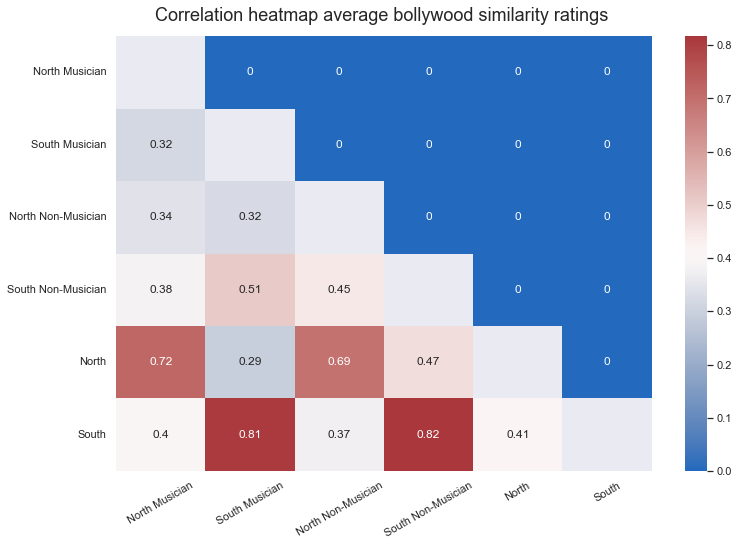

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.color_palette("vlag", as_cmap=True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df, annot=True, cmap=cmap)
plt.yticks(rotation=0) 
plt.xticks(rotation=30)
plt.title('Correlation heatmap average bollywood similarity ratings ', fontsize=18, pad=15)
plt.savefig('./figs/bollywood-heatmap.png')

## PCA

# Flattened Distance Matrix

In [206]:
def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr

In [207]:
PATH = './output/japan/similarity/'

full_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    full_partial.extend(x)
full_partial = [x/100 for x in full_partial]

In [235]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
output = pd.DataFrame()

for i in range(0, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, full_partial)
    output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
output = output.round(2)
output.to_csv('./output/analysis/japan_feature_pairwise.csv', index=None)

/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2467910764.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2467910764.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2467910764.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152

In [236]:
PATH = './output/india/pairwise/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

output = pd.DataFrame()
PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_full.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
output = output.round(2)
output.to_csv('./output/analysis/india_feature_pairwise.csv', index=None)

/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2178472131.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2178472131.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152/2178472131.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'Feature':feature_names[i-1], 'r':r, 'p-value':p}, ignore_index=True)
/var/folders/t5/g46h2p3n4bx62qf44whk03240000gp/T/ipykernel_97152

In [66]:
def get_japanese_feature_data(code):
    PATH = './data/japanese/evaluation/evaluation_'
    df = pd.read_csv(PATH+code+'.csv', header=None).drop([0,14], axis=1)
    return df

columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

participants = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

full_japan = pd.DataFrame(columns = columns)
for i in range(6):
    sum_df = pd.DataFrame(columns = columns)
    for pid in participants:
        df = get_japanese_feature_data(str(i)+pid)
        sum_df = sum_df.add(df, fill_value=0)
    average = sum_df.div(len(participants))
    full_japan = pd.concat([full_japan,average]).reset_index(drop=True)

In [69]:
full_japan.to_csv('./output/japan/feature/full_feature.csv')